# Assignment 4

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [2]:
G1 = nx.read_gpickle("assets/A4_P1_G1")
G2 = nx.read_gpickle("assets/A4_P1_G2")
G3 = nx.read_gpickle("assets/A4_P1_G3")
G4 = nx.read_gpickle("assets/A4_P1_G4")
G5 = nx.read_gpickle("assets/A4_P1_G5")
P1_Graphs = [G1, G2, G3, G4, G5]

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs using any methodology and determine which of the three algorithms generated each graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

In [3]:
import matplotlib.pyplot as plt

def plot_G(graph):
    G = graph

    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)

    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)

    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc, seed=10396953)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
    ax0.set_title("Connected components of G")
    ax0.set_axis_off()

    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()

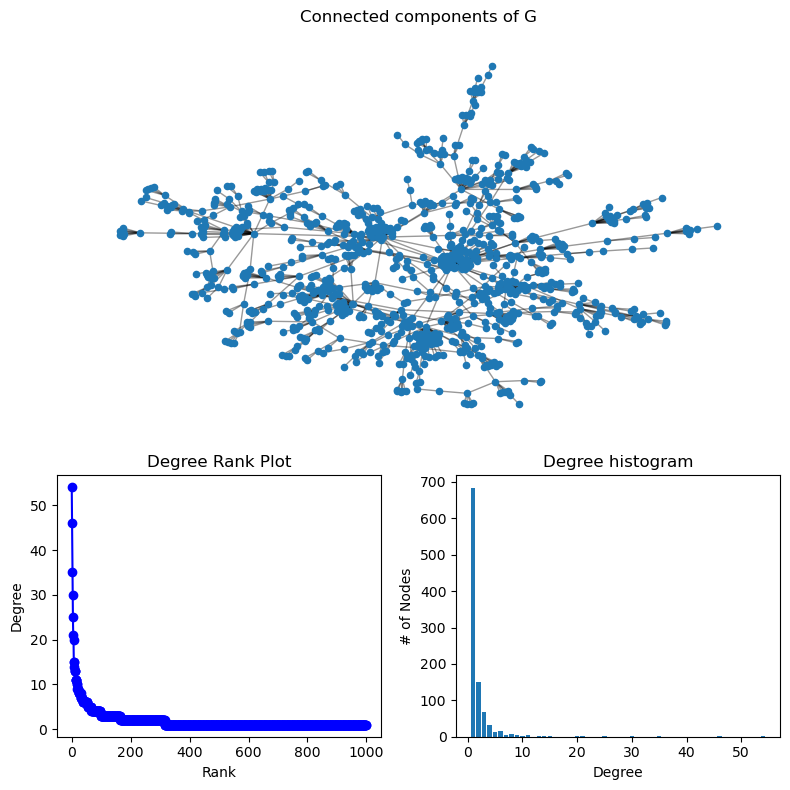

In [4]:
plot_G(G1)

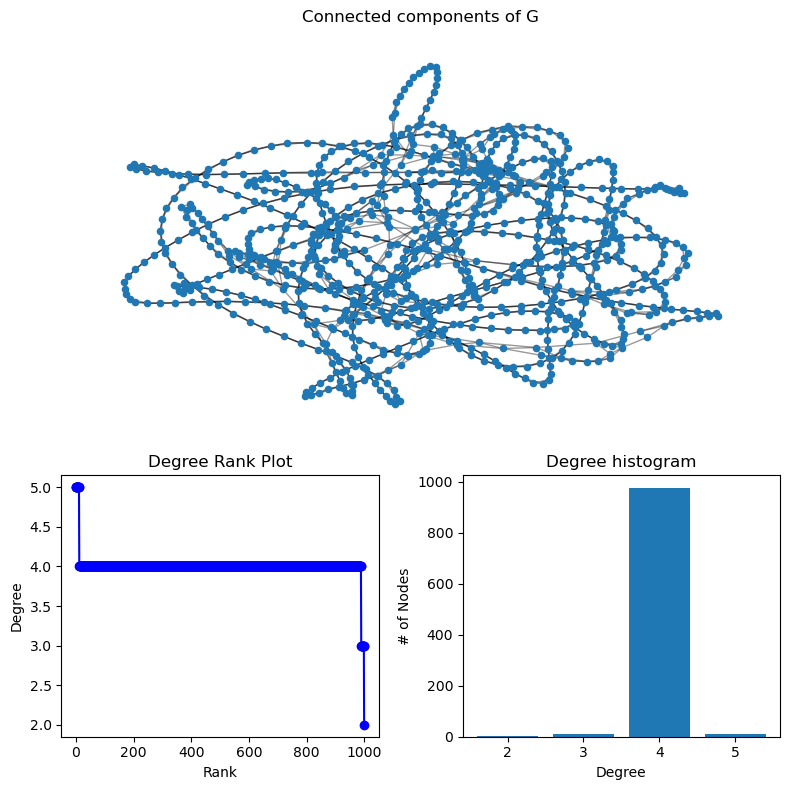

In [5]:
plot_G(G2)

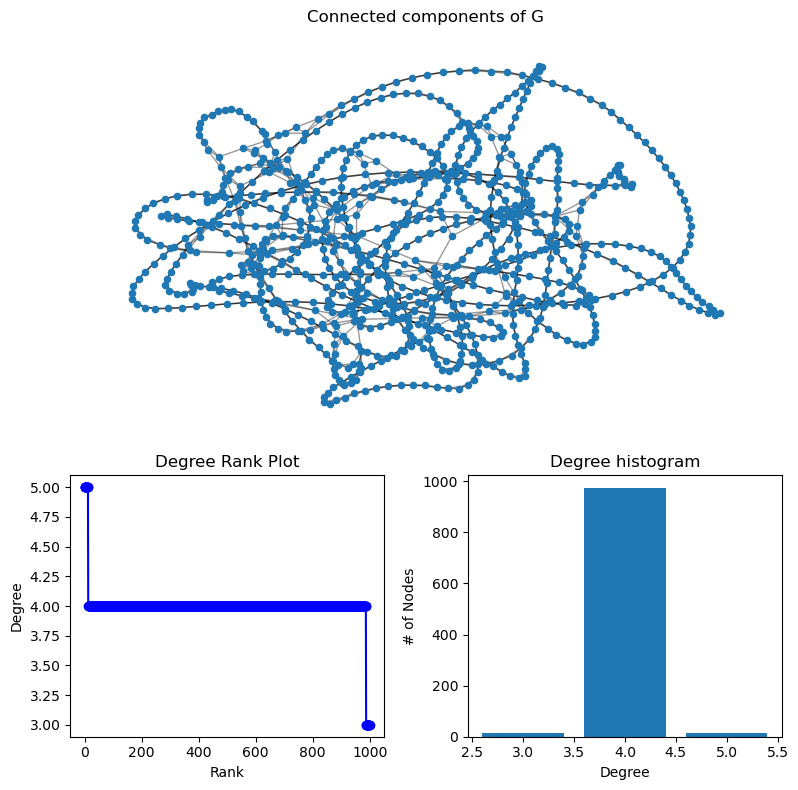

In [6]:
plot_G(G3)

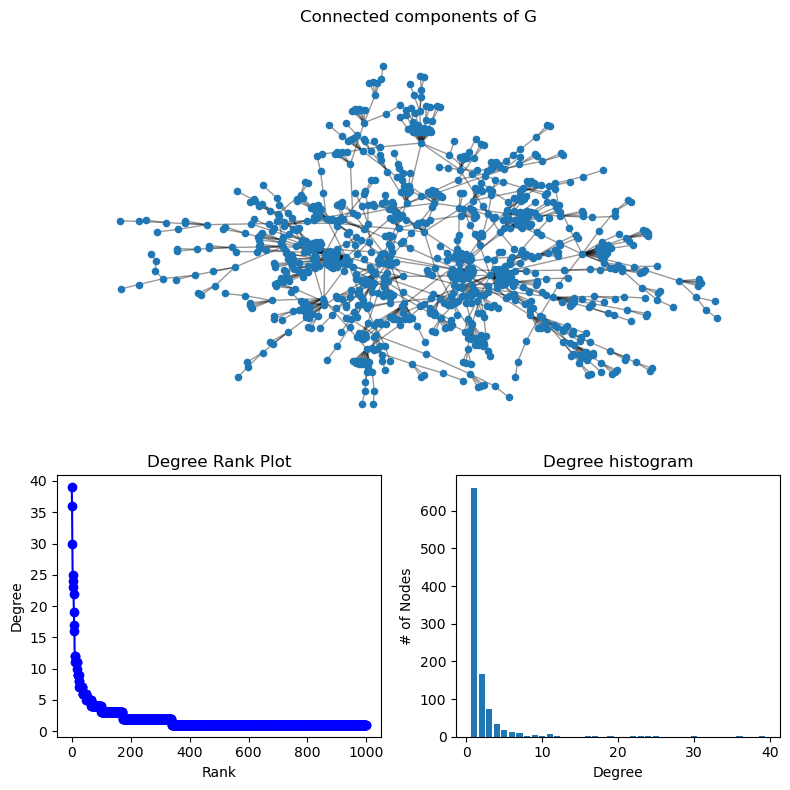

In [7]:
plot_G(G4)

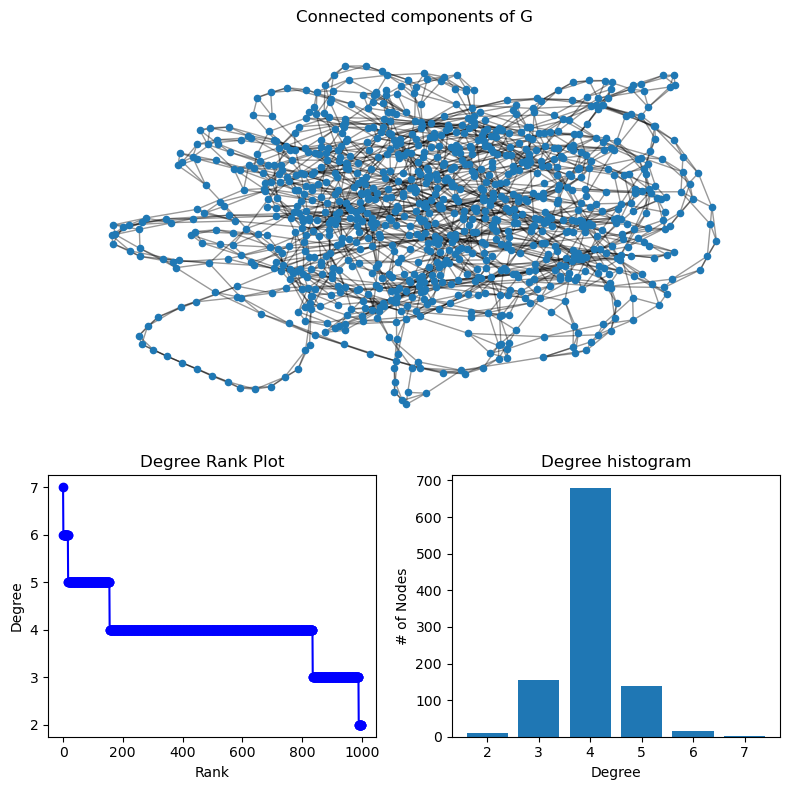

In [8]:
plot_G(G5)

In [9]:
# G1, G4: PA

In [10]:
print(nx.average_clustering(G2), nx.average_clustering(G3), nx.average_clustering(G5))

0.49310000000000004 0.4897333333333334 0.36504285714285717


In [11]:
print(nx.average_shortest_path_length(G2), nx.average_shortest_path_length(G3), nx.average_shortest_path_length(G5))

43.80284684684685 39.007695695695695 8.532046046046046


In [12]:
def graph_identification():
    return ['PA', 'SW_L', 'SW_L', 'PA', 'SW_H']

In [13]:
ans_one = graph_identification()
assert type(ans_one) == list, "You must return a list"


---

## Part 2 - Company Emails

For the second part of this assignment you will be working with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagmentSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagmentSalary` indicates whether that person is receiving a managment position salary.

In [14]:
G = pickle.load(open('assets/email_prediction_NEW.txt', 'rb'))

print(f"Graph with {len(nx.nodes(G))} nodes and {len(nx.edges(G))} edges")

Graph with 1005 nodes and 16706 edges


### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a managment position salary.

To accomplish this, you will need to create a matrix of node features of your choice using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a managment salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a managment position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a Pandas series of length 252 with the data being the probability of receiving managment salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [15]:
list(G.nodes(data=True))[:5] # print the first 5 nodes

[(0, {'Department': 1, 'ManagementSalary': 0.0}),
 (1, {'Department': 1, 'ManagementSalary': nan}),
 (581, {'Department': 3, 'ManagementSalary': 0.0}),
 (6, {'Department': 25, 'ManagementSalary': 1.0}),
 (65, {'Department': 4, 'ManagementSalary': nan})]

In [16]:
list(G.nodes(data=True))[0][1]['ManagementSalary']

0.0

In [17]:
list(G.edges)[:5]

[(0, 0), (0, 1), (0, 581), (0, 6), (0, 65)]

In [18]:
bb = nx.betweenness_centrality(G)
nx.set_node_attributes(G, bb, "betweenness")

In [19]:
list(G.nodes(data=True))[:5]

[(0,
  {'Department': 1,
   'ManagementSalary': 0.0,
   'betweenness': 0.0011237189217191107}),
 (1,
  {'Department': 1,
   'ManagementSalary': nan,
   'betweenness': 0.0011950876146088482}),
 (581,
  {'Department': 3,
   'ManagementSalary': 0.0,
   'betweenness': 0.00037751066008466754}),
 (6,
  {'Department': 25,
   'ManagementSalary': 1.0,
   'betweenness': 0.012386641327812717}),
 (65,
  {'Department': 4,
   'ManagementSalary': nan,
   'betweenness': 0.012473259624662371})]

In [20]:
cc = nx.closeness_centrality(G)
nx.set_node_attributes(G, cc, "closeness")

In [21]:
list(G.nodes(data=True))[:5]

[(0,
  {'Department': 1,
   'ManagementSalary': 0.0,
   'betweenness': 0.0011237189217191107,
   'closeness': 0.42199107500130484}),
 (1,
  {'Department': 1,
   'ManagementSalary': nan,
   'betweenness': 0.0011950876146088482,
   'closeness': 0.4223599483186137}),
 (581,
  {'Department': 3,
   'ManagementSalary': 0.0,
   'betweenness': 0.00037751066008466754,
   'closeness': 0.41297417168931116}),
 (6,
  {'Department': 25,
   'ManagementSalary': 1.0,
   'betweenness': 0.012386641327812717,
   'closeness': 0.4758048063776406}),
 (65,
  {'Department': 4,
   'ManagementSalary': nan,
   'betweenness': 0.012473259624662371,
   'closeness': 0.46104940923329585})]

In [22]:
# dict(G.degree())

In [23]:
dd = dict(G.degree())
nx.set_node_attributes(G, dd, "degree")

In [24]:
list(G.nodes(data=True))[:5]

[(0,
  {'Department': 1,
   'ManagementSalary': 0.0,
   'betweenness': 0.0011237189217191107,
   'closeness': 0.42199107500130484,
   'degree': 44}),
 (1,
  {'Department': 1,
   'ManagementSalary': nan,
   'betweenness': 0.0011950876146088482,
   'closeness': 0.4223599483186137,
   'degree': 52}),
 (581,
  {'Department': 3,
   'ManagementSalary': 0.0,
   'betweenness': 0.00037751066008466754,
   'closeness': 0.41297417168931116,
   'degree': 32}),
 (6,
  {'Department': 25,
   'ManagementSalary': 1.0,
   'betweenness': 0.012386641327812717,
   'closeness': 0.4758048063776406,
   'degree': 115}),
 (65,
  {'Department': 4,
   'ManagementSalary': nan,
   'betweenness': 0.012473259624662371,
   'closeness': 0.46104940923329585,
   'degree': 91})]

In [25]:
df_node = pd.DataFrame(columns=['node', 'Department', 'ManagementSalary', 'betweenness', 'closeness', 'degree'])
for i in range(len(list(G.nodes(data=True)))):
    df_node.loc[len(df_node.index)] = list(G.nodes(data=True))[i][0]
    # df_node['node'][i] = list(G.nodes(data=True))[i][0]
    df_node['Department'][i] = list(G.nodes(data=True))[i][1]['Department']
    df_node['ManagementSalary'][i] = list(G.nodes(data=True))[i][1]['ManagementSalary']
    df_node['betweenness'][i] = list(G.nodes(data=True))[i][1]['betweenness']
    df_node['closeness'][i] = list(G.nodes(data=True))[i][1]['closeness']
    df_node['degree'][i] = list(G.nodes(data=True))[i][1]['degree']
df_node

,node,Department,ManagementSalary,betweenness,closeness,degree
0,0,1,0.0,0.001124,0.421991,44
1,1,1,NaN,0.001195,0.422360,52
2,581,3,0.0,0.000378,0.412974,32
3,6,25,1.0,0.012387,0.475805,115
4,65,4,NaN,0.012473,0.461049,91
...,...,...,...,...,...,...
1000,798,1,NaN,0.000000,0.000000,2
1001,808,20,NaN,0.000000,0.000000,2
1002,965,4,0.0,0.000000,0.277769,1
1003,973,14,0.0,0.000000,0.305327,1


In [26]:
df_edge = nx.to_pandas_edgelist(G)
df_edge

,source,target
0,0,0
1,0,1
2,0,581
3,0,6
4,0,65
...,...,...
16701,744,744
16702,746,746
16703,772,772
16704,798,798


In [27]:
df_edge['source_management'] = np.nan
df_edge['target_management'] = np.nan
for i in range(len(df_edge)):
    index_source = np.where(df_node['node'] == df_edge['source'][i])
    index_source = index_source[0][0]
    df_edge['source_management'][i] = df_node['ManagementSalary'][index_source]
    index_target = np.where(df_node['node'] == df_edge['target'][i])
    index_target = index_target[0][0]
    df_edge['target_management'][i] = df_node['ManagementSalary'][index_target]
df_edge

,source,target,source_management,target_management
0,0,0,0.0,0.0
1,0,1,0.0,NaN
2,0,581,0.0,0.0
3,0,6,0.0,1.0
4,0,65,0.0,NaN
...,...,...,...,...
16701,744,744,0.0,0.0
16702,746,746,0.0,0.0
16703,772,772,0.0,0.0
16704,798,798,NaN,NaN


In [28]:
indices = np.where(df_node['node'] == 500)
row_indices = indices[0][0]
print(row_indices)

370


In [29]:
indices = np.where(df_edge['source'] == 0)
# for i in indices[0]:
#     print(i)
print(indices[0])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]


In [30]:
df_node['node'][370]

500

In [31]:
missing = 0
for i in range(len(list(G.nodes(data=True)))):
    if np.isnan(G.nodes(data=True)[i]['ManagementSalary']):
        missing += 1
print(missing)

252


In [32]:
df_node['connected_management'] = 0
df_node['connected_not_management'] = 0
for i in range(len(df_node)):
    indices = np.where(df_edge['source'] == df_node['node'][i])
    for j in indices[0]:
        if df_edge['target_management'][j] == 1.0:
            df_node['connected_management'][i] += 1
        elif df_edge['target_management'][j] == 0.0:
            df_node['connected_not_management'][i] += 1
        else:
            pass
    indices = np.where(df_edge['target'] == df_node['node'][i])
    for j in indices[0]:
        if df_edge['source_management'][j] == 1.0:
            df_node['connected_management'][i] += 1
        elif df_edge['source_management'][j] == 0.0:
            df_node['connected_not_management'][i] += 1
        else:
            pass
df_node

,node,Department,ManagementSalary,betweenness,closeness,degree,connected_management,connected_not_management
0,0,1,0.0,0.001124,0.421991,44,6,27
1,1,1,NaN,0.001195,0.422360,52,15,27
2,581,3,0.0,0.000378,0.412974,32,4,13
3,6,25,1.0,0.012387,0.475805,115,35,52
4,65,4,NaN,0.012473,0.461049,91,19,49
...,...,...,...,...,...,...,...,...
1000,798,1,NaN,0.000000,0.000000,2,0,0
1001,808,20,NaN,0.000000,0.000000,2,0,0
1002,965,4,0.0,0.000000,0.277769,1,0,1
1003,973,14,0.0,0.000000,0.305327,1,1,0


In [33]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

preprocessor = make_column_transformer(
 (StandardScaler(), ['Department', 'betweenness', 'closeness', 'degree', 'connected_management', 'connected_not_management']),
    remainder='passthrough'
)

X_transformed = preprocessor.fit_transform(df_node)

In [34]:
df_t = pd.DataFrame(X_transformed, columns=['Department', 'betweenness', 'closeness', 'degree', 'connected_management', 'connected_not_management', 'node','ManagementSalary'])
df_t

,Department,betweenness,closeness,degree,connected_management,connected_not_management,node,ManagementSalary
0,-1.254622,-0.090596,0.565407,0.288218,-0.301406,0.667432,0.0,0.0
1,-1.254622,-0.074398,0.570337,0.502621,0.431252,0.667432,1.0,NaN
2,-1.061411,-0.259951,0.444906,-0.033387,-0.464219,-0.147032,581.0,0.0
3,1.063910,2.465577,1.284571,2.191046,2.059381,2.121832,6.0,1.0
4,-0.964805,2.485236,1.087381,1.547836,0.756878,1.947304,65.0,NaN
...,...,...,...,...,...,...,...,...
1000,-1.254622,-0.345629,-5.074061,-0.837399,-0.789845,-0.903320,798.0,NaN
1001,0.580882,-0.345629,-5.074061,-0.837399,-0.789845,-0.903320,808.0,NaN
1002,-0.964805,-0.345629,-1.361965,-0.864199,-0.789845,-0.845144,965.0,0.0
1003,0.001250,-0.345629,-0.993687,-0.864199,-0.708439,-0.903320,973.0,0.0


In [35]:
test = df_t[np.isnan(df_t['ManagementSalary'])]

In [36]:
test

,Department,betweenness,closeness,degree,connected_management,connected_not_management,node,ManagementSalary
1,-1.254622,-0.074398,0.570337,0.502621,0.431252,0.667432,1.0,NaN
4,-0.964805,2.485236,1.087381,1.547836,0.756878,1.947304,65.0,NaN
12,-1.254622,0.352426,0.833708,0.609822,0.512658,0.667432,18.0,NaN
14,-1.254622,1.021608,1.155742,1.574637,1.082503,1.656424,215.0,NaN
18,2.126570,1.488934,1.555499,2.914656,3.524697,1.889128,283.0,NaN
...,...,...,...,...,...,...,...,...
988,0.677488,-0.345629,-5.074061,-0.837399,-0.789845,-0.903320,691.0,NaN
992,0.967304,-0.345629,-1.344814,-0.810599,-0.789845,-0.903320,788.0,NaN
997,0.870699,-0.345629,-1.094282,-0.864199,-0.789845,-0.903320,944.0,NaN
1000,-1.254622,-0.345629,-5.074061,-0.837399,-0.789845,-0.903320,798.0,NaN


In [37]:
df = df_t[~np.isnan(df_t['ManagementSalary'])]

In [38]:
from sklearn.model_selection import train_test_split
X = df.drop(['node', 'ManagementSalary'] , axis=1)
y = df['ManagementSalary']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
y_binary = rf.predict(X_val)
y_binary

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [41]:
y_pred = rf.predict_proba(X_val)

In [42]:
y_p = []
for i in y_pred:
    y_p.append(i[1])

In [43]:
y_binary - y_p

array([-0.01, -0.09, -0.3 ,  0.  ,  0.  , -0.24, -0.1 ,  0.  ,  0.  ,
        0.  , -0.45, -0.01,  0.  , -0.4 , -0.08,  0.  , -0.04, -0.01,
       -0.14, -0.2 , -0.04,  0.  , -0.14,  0.  , -0.03, -0.28, -0.22,
        0.06, -0.11, -0.28, -0.01,  0.  ,  0.  ,  0.  ,  0.41,  0.  ,
       -0.33,  0.  ,  0.19, -0.32,  0.  ,  0.  , -0.22,  0.  ,  0.  ,
       -0.01,  0.  ,  0.  , -0.02,  0.  , -0.47,  0.  , -0.33, -0.02,
       -0.27,  0.  , -0.14, -0.04,  0.  ,  0.42, -0.15,  0.  ,  0.  ,
       -0.02,  0.  , -0.06, -0.02,  0.  , -0.04, -0.02,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  , -0.4 , -0.11,  0.33,  0.  , -0.08,  0.  ,
       -0.13,  0.  ,  0.  ,  0.  , -0.45,  0.  , -0.03, -0.12,  0.  ,
       -0.05,  0.29, -0.22,  0.  ,  0.  , -0.11,  0.  , -0.45, -0.1 ,
       -0.02,  0.  , -0.04, -0.09,  0.  , -0.12, -0.38, -0.09, -0.03,
        0.  , -0.06, -0.02, -0.08,  0.  , -0.44, -0.03,  0.  ,  0.09,
        0.  , -0.14,  0.  , -0.1 , -0.15, -0.01, -0.41,  0.  ,  0.  ,
       -0.02, -0.2 ,

In [44]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_binary)
print("Accuracy:", accuracy)

Accuracy: 0.8675496688741722


In [54]:
X_test = test.drop(['node', 'ManagementSalary'] , axis=1)
y_predictions = rf.predict_proba(X_test)
y_test = []
for i in y_predictions:
    y_test.append(i[1])
# y_test

In [46]:
predictions = pd.Series(data=y_test, index=test['node'])
predictions

node
1.0      0.02
65.0     0.93
18.0     0.15
215.0    0.90
283.0    0.97
         ... 
691.0    0.02
788.0    0.03
944.0    0.00
798.0    0.04
808.0    0.02
Length: 252, dtype: float64

In [47]:
def salary_predictions():
    return pd.Series(data=y_test, index=test['node'])

In [48]:
ans_salary_preds = salary_predictions()
assert type(ans_salary_preds) == pd.core.series.Series, "You must return a Pandas series"
assert len(ans_salary_preds) == 252, "The series must be of length 252"


### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [49]:
G = pickle.load(open('assets/email_prediction_NEW.txt', 'rb'))

print(f"Graph with {len(nx.nodes(G))} nodes and {len(nx.edges(G))} edges")

Graph with 1005 nodes and 16706 edges


In [50]:
future_connections = pd.read_csv('assets/Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.head(10)

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
"(97, 226)",1.0
"(349, 905)",0.0
"(429, 860)",0.0
"(309, 989)",0.0
"(468, 880)",0.0


In [51]:
future_connections

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
...,...
"(165, 923)",NaN
"(673, 755)",NaN
"(939, 940)",NaN
"(555, 905)",NaN


Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to:      
1. Create a matrix of features of your choice for the edges found in `future_connections` using Networkx     
2. Train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data     
3. Predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.75 or higher will recieve full points.

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [61]:
list(G.edges(data=True))[0:10]

[(0, 0, {}),
 (0, 1, {}),
 (0, 581, {}),
 (0, 6, {}),
 (0, 65, {}),
 (0, 64, {}),
 (0, 73, {}),
 (0, 74, {}),
 (0, 459, {}),
 (0, 268, {})]

In [62]:
df = pd.DataFrame(index=G.edges())
df.head()

Empty DataFrame
Columns: []
Index: [(0, 0), (0, 1), (0, 581), (0, 6), (0, 65)]

In [68]:
future_connections['preferential attachment'] = [i[2] for i in nx.preferential_attachment(G, future_connections.index)]
future_connections

,Future Connection,preferential attachment
"(6, 840)",0.0,2070
"(4, 197)",0.0,3552
"(620, 979)",0.0,28
"(519, 872)",0.0,299
"(382, 423)",0.0,205
...,...,...
"(165, 923)",NaN,714
"(673, 755)",NaN,3
"(939, 940)",NaN,6
"(555, 905)",NaN,160


In [69]:
future_connections['Common Neighbors'] = future_connections.index.map(lambda ppl: len(list(nx.common_neighbors(G, ppl[0], ppl[1]))))
future_connections

,Future Connection,preferential attachment,Common Neighbors
"(6, 840)",0.0,2070,9
"(4, 197)",0.0,3552,2
"(620, 979)",0.0,28,0
"(519, 872)",0.0,299,2
"(382, 423)",0.0,205,0
...,...,...,...
"(165, 923)",NaN,714,0
"(673, 755)",NaN,3,0
"(939, 940)",NaN,6,0
"(555, 905)",NaN,160,0


In [70]:
future_connections['jaccard_coefficient'] = [i[2] for i in nx.jaccard_coefficient(G, future_connections.index)]
future_connections

,Future Connection,preferential attachment,Common Neighbors,jaccard_coefficient
"(6, 840)",0.0,2070,9,0.073770
"(4, 197)",0.0,3552,2,0.015504
"(620, 979)",0.0,28,0,0.000000
"(519, 872)",0.0,299,2,0.060606
"(382, 423)",0.0,205,0,0.000000
...,...,...,...,...
"(165, 923)",NaN,714,0,0.000000
"(673, 755)",NaN,3,0,0.000000
"(939, 940)",NaN,6,0,0.000000
"(555, 905)",NaN,160,0,0.000000


In [71]:
future_connections['resource_allocation_index'] = [i[2] for i in nx.resource_allocation_index(G, future_connections.index)]
future_connections

,Future Connection,preferential attachment,Common Neighbors,jaccard_coefficient,resource_allocation_index
"(6, 840)",0.0,2070,9,0.073770,0.136721
"(4, 197)",0.0,3552,2,0.015504,0.008437
"(620, 979)",0.0,28,0,0.000000,0.000000
"(519, 872)",0.0,299,2,0.060606,0.039726
"(382, 423)",0.0,205,0,0.000000,0.000000
...,...,...,...,...,...
"(165, 923)",NaN,714,0,0.000000,0.000000
"(673, 755)",NaN,3,0,0.000000,0.000000
"(939, 940)",NaN,6,0,0.000000,0.000000
"(555, 905)",NaN,160,0,0.000000,0.000000


In [80]:
future_connections['pairs'] = future_connections.index
future_connections

,Future Connection,preferential attachment,Common Neighbors,jaccard_coefficient,resource_allocation_index,pairs
"(6, 840)",0.0,2070,9,0.073770,0.136721,"(6, 840)"
"(4, 197)",0.0,3552,2,0.015504,0.008437,"(4, 197)"
"(620, 979)",0.0,28,0,0.000000,0.000000,"(620, 979)"
"(519, 872)",0.0,299,2,0.060606,0.039726,"(519, 872)"
"(382, 423)",0.0,205,0,0.000000,0.000000,"(382, 423)"
...,...,...,...,...,...,...
"(165, 923)",NaN,714,0,0.000000,0.000000,"(165, 923)"
"(673, 755)",NaN,3,0,0.000000,0.000000,"(673, 755)"
"(939, 940)",NaN,6,0,0.000000,0.000000,"(939, 940)"
"(555, 905)",NaN,160,0,0.000000,0.000000,"(555, 905)"


In [88]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

preprocessor = make_column_transformer(
 (StandardScaler(), ['preferential attachment', 'Common Neighbors', 'jaccard_coefficient', 'resource_allocation_index']),
    remainder='passthrough'
)

X_transformed = preprocessor.fit_transform(future_connections)
df_t = pd.DataFrame(X_transformed, columns=['preferential attachment', 'Common Neighbors', 'jaccard_coefficient', 'resource_allocation_index', 'Future Connection', 'pairs'])
df_t

,preferential attachment,Common Neighbors,jaccard_coefficient,resource_allocation_index,Future Connection,pairs
0,0.63985,1.797224,1.43941,2.168278,0.0,"(6, 840)"
1,1.487623,0.056047,-0.118655,-0.222488,0.0,"(4, 197)"
2,-0.528269,-0.441432,-0.533233,-0.379732,0.0,"(620, 979)"
3,-0.373245,0.056047,1.08739,0.360614,0.0,"(519, 872)"
4,-0.427017,-0.441432,-0.533233,-0.379732,0.0,"(382, 423)"
...,...,...,...,...,...,...
488441,-0.135845,-0.441432,-0.533233,-0.379732,NaN,"(165, 923)"
488442,-0.54257,-0.441432,-0.533233,-0.379732,NaN,"(673, 755)"
488443,-0.540854,-0.441432,-0.533233,-0.379732,NaN,"(939, 940)"
488444,-0.452759,-0.441432,-0.533233,-0.379732,NaN,"(555, 905)"


In [104]:
test = df_t[pd.isnull(df_t['Future Connection'])]
df = df_t[~pd.isnull(df_t['Future Connection'])]

from sklearn.model_selection import train_test_split
X = df.drop(['Future Connection', 'pairs'] , axis=1)
y = df['Future Connection'].astype(float)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_binary = rf.predict(X_val)
y_binary

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_binary)
print("Accuracy:", accuracy)

Accuracy: 0.9562968321345217


In [106]:
X_test = test.drop(['Future Connection', 'pairs'] , axis=1)
y_predictions = rf.predict_proba(X_test)
y_test = []
for i in y_predictions:
    y_test.append(i[1])
# y_test

In [107]:
predictions = pd.Series(data=y_test, index=test.pairs)
predictions

pairs
(107, 348)    0.000000
(542, 751)    0.011436
(20, 426)     0.580000
(50, 989)     0.015825
(942, 986)    0.011325
                ...   
(165, 923)    0.018914
(673, 755)    0.009861
(939, 940)    0.011325
(555, 905)    0.020626
(75, 101)     0.000000
Length: 122112, dtype: float64

In [108]:
def new_connections_predictions():
    return pd.Series(data=y_test, index=test.pairs)

In [109]:
ans_prob_preds = new_connections_predictions()
assert type(ans_prob_preds) == pd.core.series.Series, "You must return a Pandas series"
assert len(ans_prob_preds) == 122112, "The series must be of length 122112"
